In [1]:
import numpy as np
import matplotlib.pyplot as plt

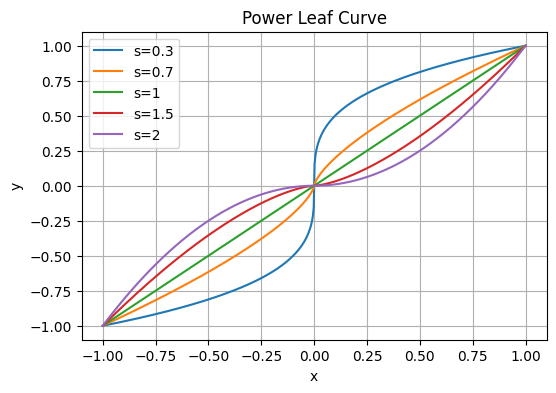

In [5]:
def power_leaf(x, s):
    return np.sign(x) * np.abs(x) ** s

x = np.linspace(-1, 1, 500)
plt.figure(figsize=(6, 4))
for s in [0.3, 0.7, 1, 1.5, 2]:
    plt.plot(x, power_leaf(x, s), label=f's={s}')
plt.title("Power Leaf Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


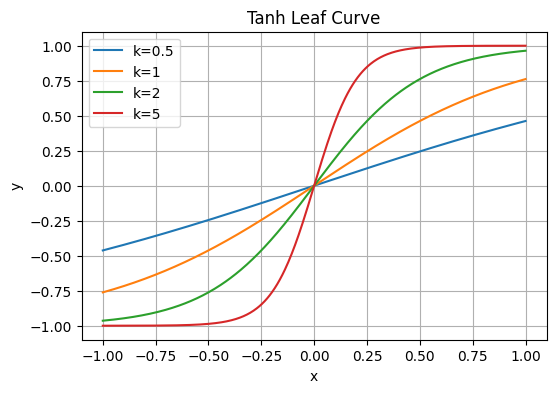

In [6]:
def tanh_leaf(x, k):
    return np.tanh(k * x)

plt.figure(figsize=(6, 4))
for k in [0.5, 1, 2, 5]:
    plt.plot(x, tanh_leaf(x, k), label=f'k={k}')
plt.title("Tanh Leaf Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


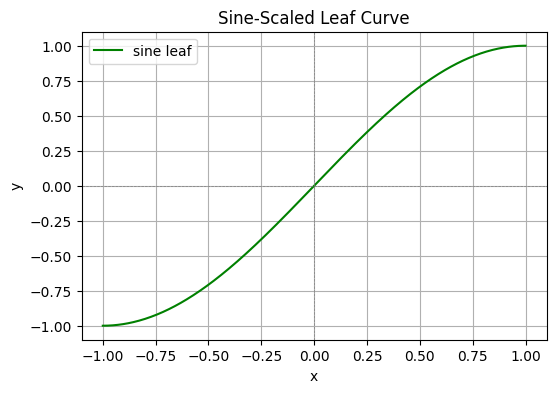

In [7]:
def sine_leaf(x):
    return np.sin((np.pi / 2) * x)

plt.figure(figsize=(6, 4))
plt.plot(x, sine_leaf(x), label='sine leaf', color='green')
plt.title("Sine-Scaled Leaf Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


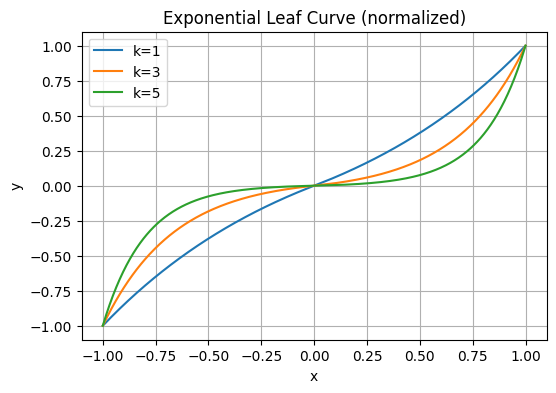

In [8]:
def exp_leaf(x, k=3):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    y = y / np.max(np.abs(y))  # normalize to [-1, 1]
    return y

plt.figure(figsize=(6, 4))
for k in [1, 3, 5]:
    plt.plot(x, exp_leaf(x, k), label=f'k={k}')
plt.title("Exponential Leaf Curve (normalized)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/4108402691.py:15: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/4108402691.py:16: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))


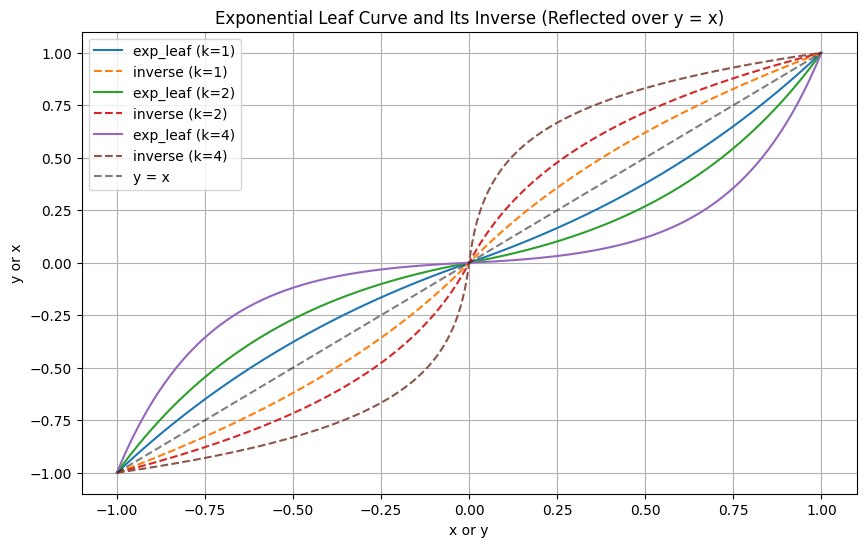

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Original exponential leaf function (normalized)
def exp_leaf(x, k=3):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    y = y / (np.exp(k) - 1)  # normalize to [-1, 1]
    return y

# Inverse (reflected) exponential leaf function
def exp_leaf_inverse(y, k=3):
    y = np.clip(y, -1, 1)  # ensure y is within domain
    denom = np.exp(k) - 1
    x = np.where(y < 0,
                 -1 / k * np.log(-y * denom + 1),
                  1 / k * np.log(y * denom + 1))
    return x

# Plot settings
x_vals = np.linspace(-1, 1, 500)
y_vals = np.linspace(-1, 1, 500)
k_values = [1, 2, 4]

plt.figure(figsize=(10, 6))

for k in k_values:
    y_from_x = exp_leaf(x_vals, k)
    x_from_y = exp_leaf_inverse(y_vals, k)

    plt.plot(x_vals, y_from_x, label=f'exp_leaf (k={k})')
    plt.plot(y_from_x, x_vals, linestyle='--', label=f'inverse (k={k})')

# Plot y = x line for reference
plt.plot([-1, 1], [-1, 1], 'k--', label='y = x', alpha=0.5)

plt.title("Exponential Leaf Curve and Its Inverse (Reflected over y = x)")
plt.xlabel("x or y")
plt.ylabel("y or x")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/1792092932.py:14: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/1792092932.py:15: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))


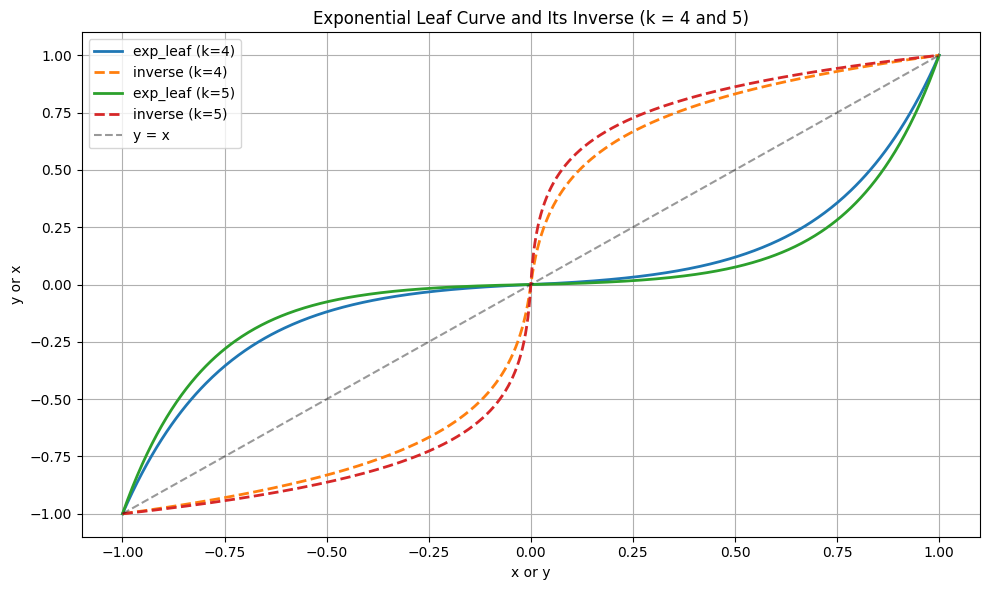

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Exponential leaf function (normalized)
def exp_leaf(x, k):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    return y / (np.exp(k) - 1)

# Inverse of the exponential leaf function
def exp_leaf_inverse(y, k):
    y = np.clip(y, -1, 1)
    denom = np.exp(k) - 1
    return np.where(y < 0,
                    -1 / k * np.log(-y * denom + 1),
                     1 / k * np.log(y * denom + 1))

# Define x and y domains
x_vals = np.linspace(-1, 1, 500)
y_vals = np.linspace(-1, 1, 500)
k_values = [4, 5]

plt.figure(figsize=(10, 6))

for k in k_values:
    y_from_x = exp_leaf(x_vals, k)
    x_from_y = exp_leaf_inverse(y_vals, k)

    plt.plot(x_vals, y_from_x, label=f'exp_leaf (k={k})', linewidth=2)
    plt.plot(y_from_x, x_vals, '--', label=f'inverse (k={k})', linewidth=2)

# Reference line y = x
plt.plot([-1, 1], [-1, 1], 'k--', alpha=0.4, label='y = x')

plt.title("Exponential Leaf Curve and Its Inverse (k = 4 and 5)")
plt.xlabel("x or y")
plt.ylabel("y or x")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ok this looks decent to me, a bit better than the shit i was using earlier

buy curve and sell curve functions will need conditionals here

suppose x - axis is z-score, and y - axis is position. lets say we want to increase our position as z-score increases
buy curve underneath, sell curve on top

/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/2004810845.py:15: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))


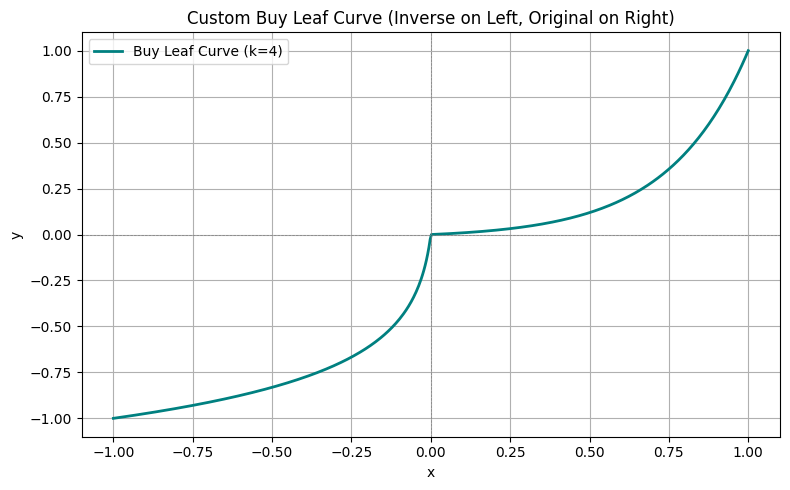

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Original exp leaf (normalized)
def exp_leaf(x, k):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    return y / (np.exp(k) - 1)

# Inverse of exp leaf
def exp_leaf_inverse(y, k):
    y = np.clip(y, -1, 1)
    denom = np.exp(k) - 1
    return np.where(y < 0,
                    -1 / k * np.log(-y * denom + 1),
                     1 / k * np.log(y * denom + 1))

# New buy curve: inverse on x < 0, normal on x > 0
def buy_leaf(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    # For x < 0, use inverse curve flipped (x is the y input)
    left_mask = x < 0
    y[left_mask] = exp_leaf_inverse(x[left_mask], k)
    # For x >= 0, use standard exp_leaf
    right_mask = x >= 0
    y[right_mask] = exp_leaf(x[right_mask], k)
    return y

# Plot it
x_vals = np.linspace(-1, 1, 500)
k = 4  # or 5, experiment with both

y_buy = buy_leaf(x_vals, k)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_buy, label=f'Buy Leaf Curve (k={k})', color='teal', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Custom Buy Leaf Curve (Inverse on Left, Original on Right)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/446864877.py:14: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),


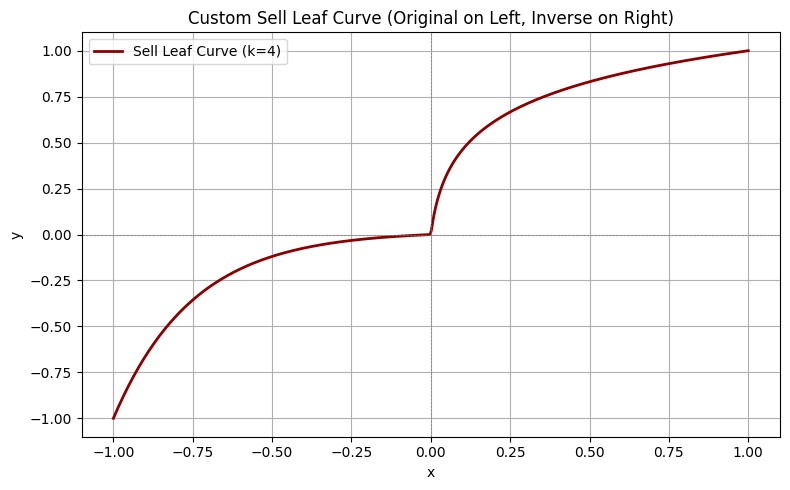

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Standard exponential leaf (normalized)
def exp_leaf(x, k):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    return y / (np.exp(k) - 1)

# Inverse of the exponential leaf
def exp_leaf_inverse(y, k):
    y = np.clip(y, -1, 1)
    denom = np.exp(k) - 1
    return np.where(y < 0,
                    -1 / k * np.log(-y * denom + 1),
                     1 / k * np.log(y * denom + 1))

# Sell curve: standard exp_leaf on left, inverse on right
def sell_leaf(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    # Left side (x < 0): use standard exponential leaf
    left_mask = x < 0
    y[left_mask] = exp_leaf(x[left_mask], k)
    # Right side (x >= 0): use inverse
    right_mask = x >= 0
    y[right_mask] = exp_leaf_inverse(x[right_mask], k)
    return y

# Plot it
x_vals = np.linspace(-1, 1, 500)
k = 4  # You can try k = 5 as well

y_sell = sell_leaf(x_vals, k)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_sell, label=f'Sell Leaf Curve (k={k})', color='darkred', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Custom Sell Leaf Curve (Original on Left, Inverse on Right)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/3637579892.py:15: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/3637579892.py:14: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),


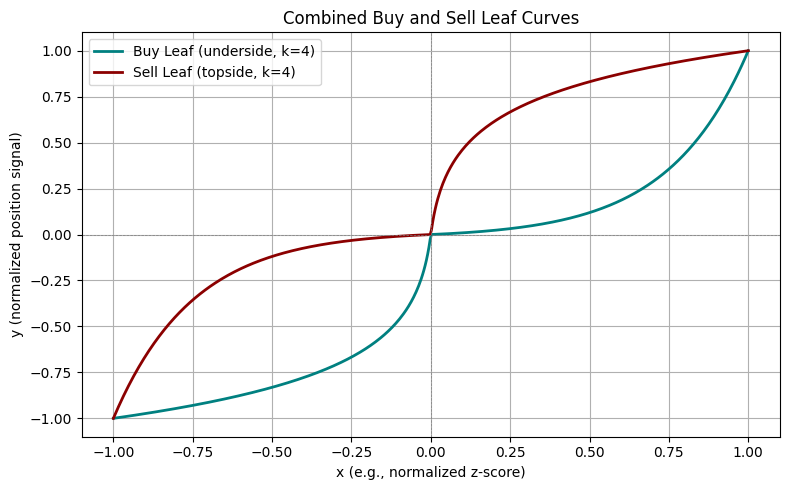

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Standard exponential leaf (normalized)
def exp_leaf(x, k):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    return y / (np.exp(k) - 1)

# Inverse of exponential leaf
def exp_leaf_inverse(y, k):
    y = np.clip(y, -1, 1)
    denom = np.exp(k) - 1
    return np.where(y < 0,
                    -1 / k * np.log(-y * denom + 1),
                     1 / k * np.log(y * denom + 1))

# Buy curve: inverse on left, original on right
def buy_leaf(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    y[x < 0] = exp_leaf_inverse(x[x < 0], k)
    y[x >= 0] = exp_leaf(x[x >= 0], k)
    return y

# Sell curve: original on left, inverse on right
def sell_leaf(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    y[x < 0] = exp_leaf(x[x < 0], k)
    y[x >= 0] = exp_leaf_inverse(x[x >= 0], k)
    return y

# Plot setup
x_vals = np.linspace(-1, 1, 500)
k = 4  # or experiment with k = 5

y_buy = buy_leaf(x_vals, k)
y_sell = sell_leaf(x_vals, k)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_buy, label=f'Buy Leaf (underside, k={k})', color='teal', linewidth=2)
plt.plot(x_vals, y_sell, label=f'Sell Leaf (topside, k={k})', color='darkred', linewidth=2)

# Plot reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title("Combined Buy and Sell Leaf Curves")
plt.xlabel("x (e.g., normalized z-score)")
plt.ylabel("y (normalized position signal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/3637579892.py:15: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_99219/3637579892.py:14: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),


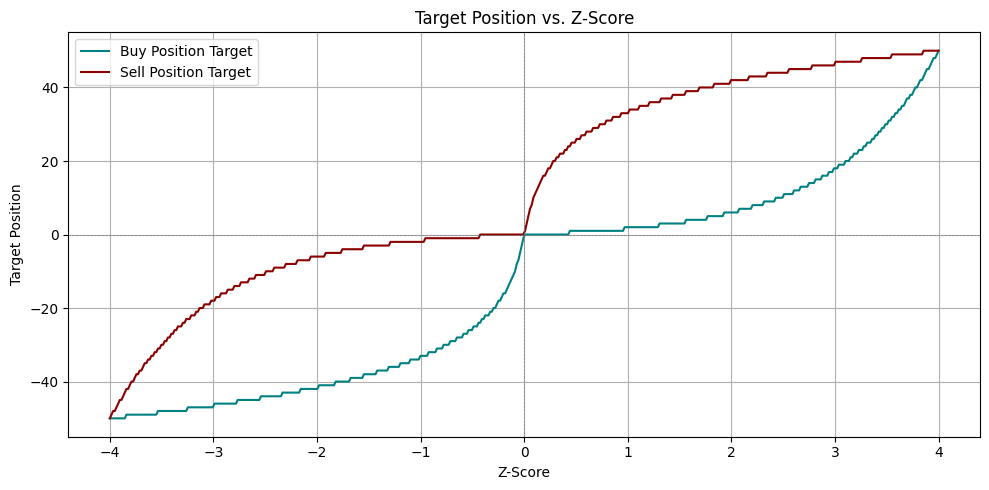

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Z-score range from -4 to 4
z_vals = np.linspace(-4, 4, 500)
k = 4  # Same as in your strategy

# Apply leaf functions and scale
buy_positions = buy_leaf(z_vals / 4, k) * 50
sell_positions = sell_leaf(z_vals / 4, k) * 50

# Round to integer positions for visualization (optional)
buy_positions_rounded = np.round(buy_positions).astype(int)
sell_positions_rounded = np.round(sell_positions).astype(int)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(z_vals, buy_positions_rounded, label='Buy Position Target', color='teal')
plt.plot(z_vals, sell_positions_rounded, label='Sell Position Target', color='darkred')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title("Target Position vs. Z-Score")
plt.xlabel("Z-Score")
plt.ylabel("Target Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Below is Steven's Work

In [7]:
import pandas as pd

In [180]:
import numpy as np

def size_function(z, edge_0, edge_max, max_position = 50):
    z = np.array(z)
    direction = np.where(z > 0, -1, 1)
    abs_z = np.abs(z)
    size = np.where(
        abs_z <= edge_0,
        0,
        np.where(
            abs_z >= edge_max,
            max_position,
            max_position * ((abs_z - edge_0) / (edge_max - edge_0)) ** 2
        )
    )
    return direction * size


In [181]:
def exit_size_function(z, edge_0, edge_max, max_position = 50):
    # Positive quadratic function with points (0, 0) and (-2, 50)
    if z <= 0:
        if z >= -edge_0:
            return 0
        elif z <= -edge_max:
            return max_position
            
        a = -max_position/(edge_max - edge_0)**2
        return a * (z + edge_max)**2 + max_position
    else:
        if z <= edge_0:
            return 0
        elif z >= edge_max:
            return -max_position
        a = max_position/(edge_max - edge_0)**2
        return a * (z-edge_max)**2 - max_position


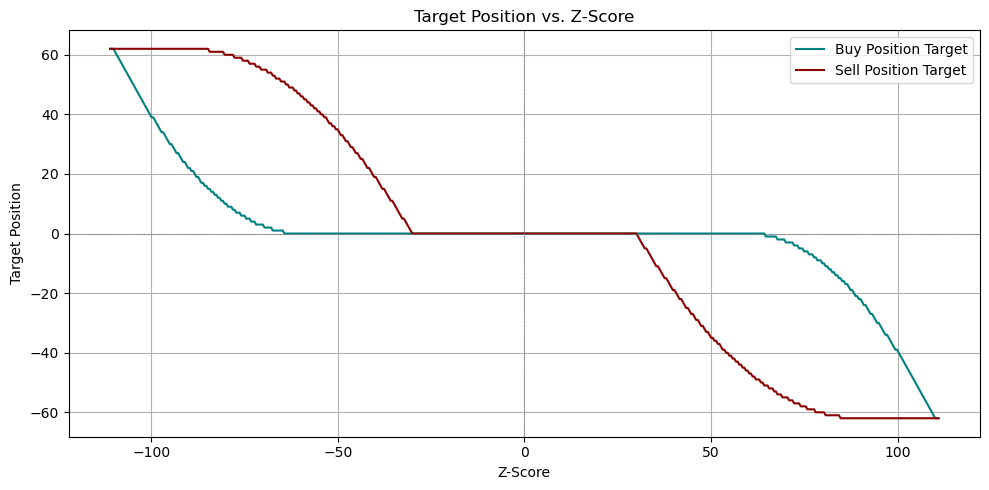

In [188]:
# Z-score range from -4 to 4
max_position = int(250/4)
edge_max = 110

z_vals = pd.Series(np.linspace(-edge_max-1, edge_max+1, 500))
k = 4  # Same as in your strategy

edge_0 = 60
# Apply leaf functions and scale
buy_positions = np.zeros(len(z_vals))
sell_positions = np.zeros(len(z_vals))


for i in range(len(z_vals)):
    buy_positions[i] = size_function(z_vals[i], edge_0, edge_max, max_position)
    sell_positions[i] = exit_size_function(z_vals[i], 30, 90, max_position)

#sell_positions = sell_leaf(z_vals / 4, k) * 50

# Round to integer positions for visualization (optional)
buy_positions_rounded = np.round(buy_positions).astype(int)
sell_positions_rounded = np.round(sell_positions).astype(int)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(z_vals, buy_positions_rounded, label='Buy Position Target', color='teal')
plt.plot(z_vals, sell_positions_rounded, label='Sell Position Target', color='darkred')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title("Target Position vs. Z-Score")
plt.xlabel("Z-Score")
plt.ylabel("Target Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [189]:
def exit_size_function(z, edge_0, edge_max, max_position = 50):
    # Positive quadratic function with points (0, 0) and (-2, 50)
    if z <= 0:
        if z >= -edge_0:
            return 0
        elif z <= -edge_max:
            return max_position
            
        a = -max_position/(edge_max - edge_0)**2
        return a * (z + edge_max)**2 + max_position
    else:
        if z <= edge_0:
            return 0
        elif z >= edge_max:
            return -max_position
        a = max_position/(edge_max - edge_0)**2
        return a * (z-edge_max)**2 - max_position


In [190]:
import numpy as np

def size_function(z, edge_0, edge_max, max_position = 50):
    z = np.array(z)
    direction = np.where(z > 0, -1, 1)
    abs_z = np.abs(z)
    size = np.where(
        abs_z <= edge_0,
        0,
        np.where(
            abs_z >= edge_max,
            max_position,
            max_position * ((abs_z - edge_0) / (edge_max - edge_0)) ** 2
        )
    )
    return direction * size
